<a href="https://colab.research.google.com/github/FredLongo/Deep_Learning_Book_exercises/blob/main/chapter04_Movie_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example 4.1

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model1l = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model3l = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model32u = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model64u = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
modelMSEloss = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
modelTanH = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model1l.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model3l.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model32u.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model64u.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
modelMSEloss.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
modelTanH.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5496 - accuracy: 0.7625 - val_loss: 0.4144 - val_accuracy: 0.8655
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3420 - accuracy: 0.8890 - val_loss: 0.3214 - val_accuracy: 0.8813
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.2534 - accuracy: 0.9167 - val_loss: 0.2973 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2056 - accuracy: 0.9309 - val_loss: 0.2833 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1748 - accuracy: 0.9413 - val_loss: 0.2805 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1485 - accuracy: 0.9514 - val_loss: 0.2851 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1315 - accuracy: 0.9585 - val_loss: 0.3006 - val_accuracy: 0.8852
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history1l = model1l.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict1l = history1l.history
history_dict1l.keys()

Epoch 1/20
30/30 [==============================] - 3s 88ms/step - loss: 0.5090 - accuracy: 0.7969 - val_loss: 0.4020 - val_accuracy: 0.8617
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.3379 - accuracy: 0.8937 - val_loss: 0.3319 - val_accuracy: 0.8797
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2699 - accuracy: 0.9114 - val_loss: 0.3165 - val_accuracy: 0.8733
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2280 - accuracy: 0.9267 - val_loss: 0.2880 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2003 - accuracy: 0.9353 - val_loss: 0.2775 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1781 - accuracy: 0.9441 - val_loss: 0.2893 - val_accuracy: 0.8823
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1598 - accuracy: 0.9507 - val_loss: 0.2978 - val_accuracy: 0.8790
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history3l = model3l.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict3l = history3l.history
history_dict3l.keys()

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5779 - accuracy: 0.7302 - val_loss: 0.4232 - val_accuracy: 0.8607
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3495 - accuracy: 0.8814 - val_loss: 0.3125 - val_accuracy: 0.8863
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2448 - accuracy: 0.9209 - val_loss: 0.2805 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1910 - accuracy: 0.9353 - val_loss: 0.2954 - val_accuracy: 0.8811
Epoch 5/20
30/30 [==============================] - 2s 76ms/step - loss: 0.1592 - accuracy: 0.9464 - val_loss: 0.3580 - val_accuracy: 0.8618
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1293 - accuracy: 0.9589 - val_loss: 0.3734 - val_accuracy: 0.8609
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1092 - accuracy: 0.9659 - val_loss: 0.3493 - val_accuracy: 0.8715
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history32u = model32u.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict32u = history32u.history
history_dict32u.keys()

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.5033 - accuracy: 0.7730 - val_loss: 0.3560 - val_accuracy: 0.8762
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2984 - accuracy: 0.8910 - val_loss: 0.3067 - val_accuracy: 0.8797
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2282 - accuracy: 0.9177 - val_loss: 0.2753 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1793 - accuracy: 0.9381 - val_loss: 0.2869 - val_accuracy: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1547 - accuracy: 0.9459 - val_loss: 0.3011 - val_accuracy: 0.8786
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1257 - accuracy: 0.9579 - val_loss: 0.3458 - val_accuracy: 0.8676
Epoch 7/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1086 - accuracy: 0.9635 - val_loss: 0.3382 - val_accuracy: 0.8818
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history64u = model64u.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict64u = history64u.history
history_dict64u.keys()

Epoch 1/20
30/30 [==============================] - 5s 88ms/step - loss: 0.5031 - accuracy: 0.7612 - val_loss: 0.4453 - val_accuracy: 0.7932
Epoch 2/20
30/30 [==============================] - 5s 161ms/step - loss: 0.2926 - accuracy: 0.8866 - val_loss: 0.3549 - val_accuracy: 0.8491
Epoch 3/20
30/30 [==============================] - 2s 69ms/step - loss: 0.2227 - accuracy: 0.9154 - val_loss: 0.2788 - val_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 2s 67ms/step - loss: 0.1762 - accuracy: 0.9347 - val_loss: 0.3333 - val_accuracy: 0.8670
Epoch 5/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1453 - accuracy: 0.9476 - val_loss: 0.2898 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1195 - accuracy: 0.9609 - val_loss: 0.3111 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0949 - accuracy: 0.9696 - val_loss: 0.3236 - val_accuracy: 0.8839
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
historyMSEloss = modelMSEloss.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dictMSEloss = historyMSEloss.history
history_dictMSEloss.keys()

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1933 - accuracy: 0.7505 - val_loss: 0.1459 - val_accuracy: 0.8170
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1099 - accuracy: 0.8845 - val_loss: 0.1030 - val_accuracy: 0.8797
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0817 - accuracy: 0.9093 - val_loss: 0.1066 - val_accuracy: 0.8595
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0652 - accuracy: 0.9299 - val_loss: 0.0933 - val_accuracy: 0.8758
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0565 - accuracy: 0.9390 - val_loss: 0.0842 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0488 - accuracy: 0.9463 - val_loss: 0.0841 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0419 - accuracy: 0.9561 - val_loss: 0.0835 - val_accuracy: 0.8854
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
historyTanH = modelTanH.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dictTanH = historyTanH.history
history_dictTanH.keys()

Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.4985 - accuracy: 0.7898 - val_loss: 0.3799 - val_accuracy: 0.8669
Epoch 2/20
30/30 [==============================] - 2s 51ms/step - loss: 0.2993 - accuracy: 0.9032 - val_loss: 0.2939 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 2s 50ms/step - loss: 0.2212 - accuracy: 0.9241 - val_loss: 0.2706 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1728 - accuracy: 0.9407 - val_loss: 0.3011 - val_accuracy: 0.8765
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1378 - accuracy: 0.9546 - val_loss: 0.2999 - val_accuracy: 0.8809
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1116 - accuracy: 0.9627 - val_loss: 0.3078 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.0894 - accuracy: 0.9718 - val_loss: 0.3666 - val_accuracy: 0.8707
Epoch 8/20
30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

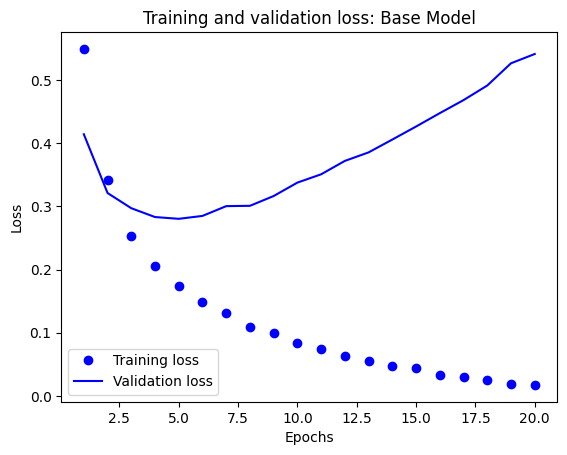

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss: Base Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

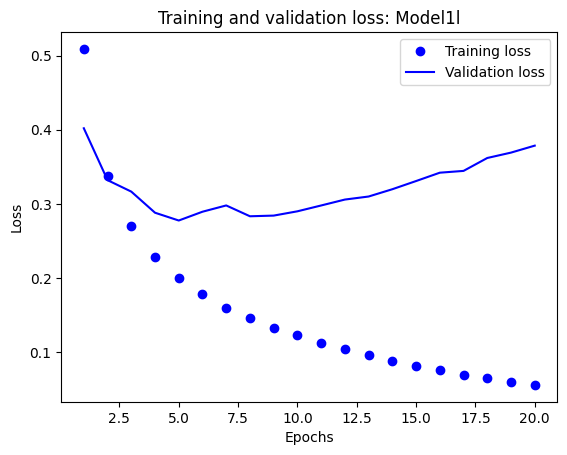

In [ ]:
loss_values = history_dict1l["loss"]
val_loss_values = history_dict1l["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss: Model1l")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

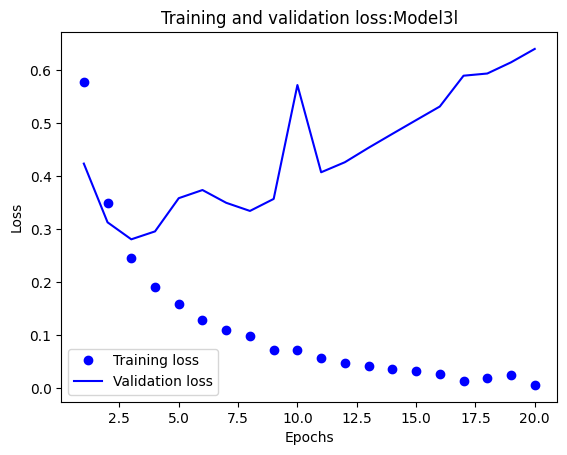

In [ ]:
loss_values = history_dict3l["loss"]
val_loss_values = history_dict3l["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss:Model3l")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

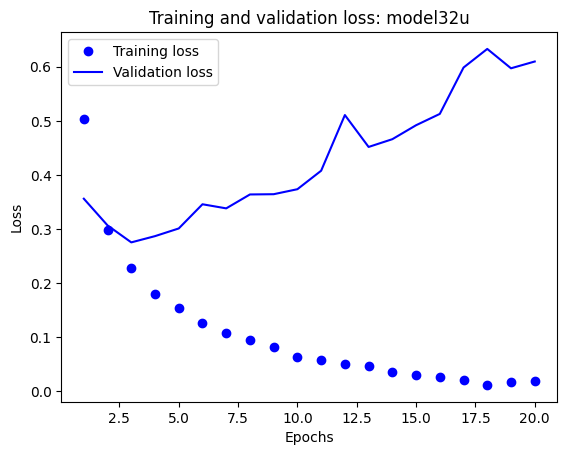

In [ ]:
loss_values = history_dict32u["loss"]
val_loss_values = history_dict32u["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss: model32u")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

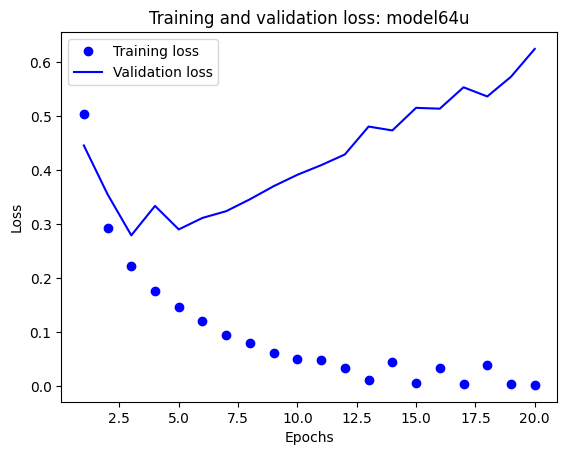

In [ ]:
loss_values = history_dict64u["loss"]
val_loss_values = history_dict64u["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss: model64u")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

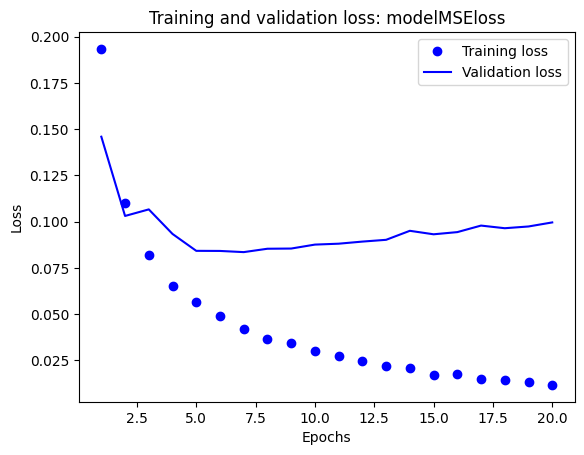

In [ ]:
loss_values = history_dictMSEloss["loss"]
val_loss_values = history_dictMSEloss["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss: modelMSEloss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

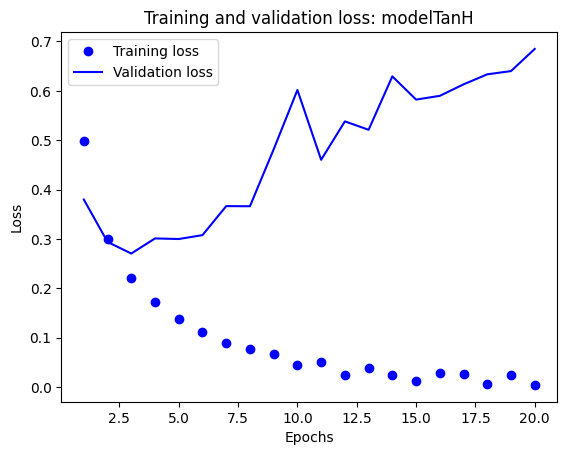

In [ ]:
loss_values = history_dictTanH["loss"]
val_loss_values = history_dictTanH["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss: modelTanH")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

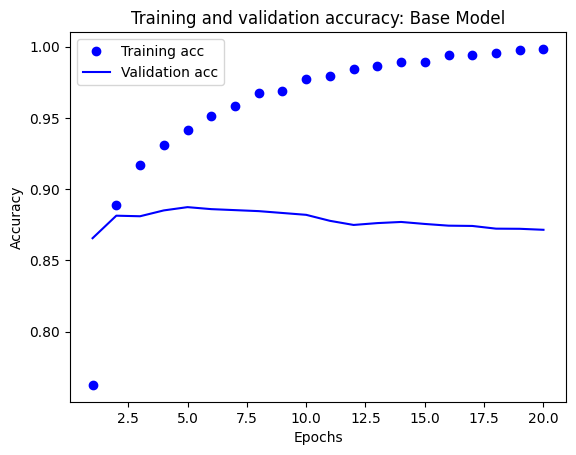

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy: Base Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

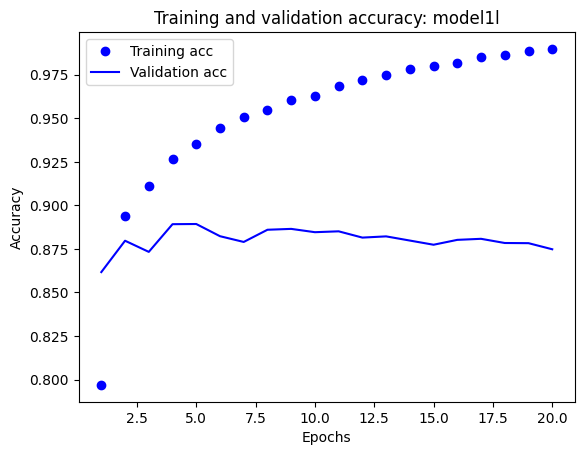

In [ ]:
plt.clf()
acc = history_dict1l["accuracy"]
val_acc = history_dict1l["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy: model1l")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

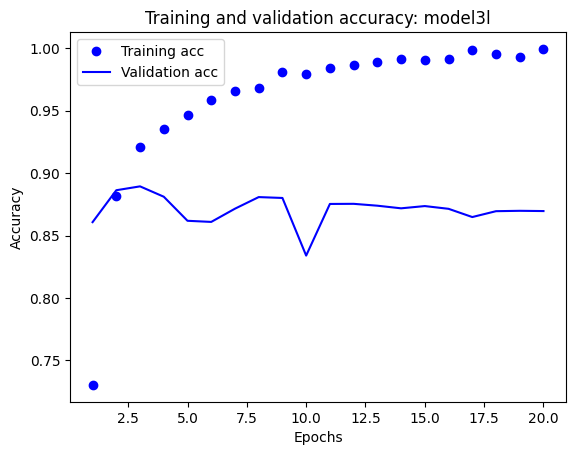

In [ ]:
plt.clf()
acc = history_dict3l["accuracy"]
val_acc = history_dict3l["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy: model3l")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

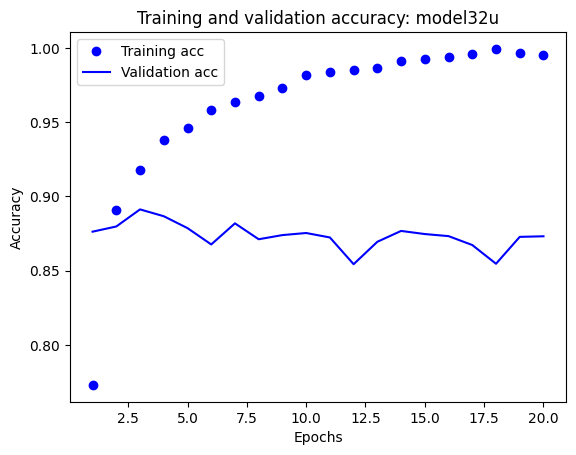

In [ ]:
plt.clf()
acc = history_dict32u["accuracy"]
val_acc = history_dict32u["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy: model32u")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

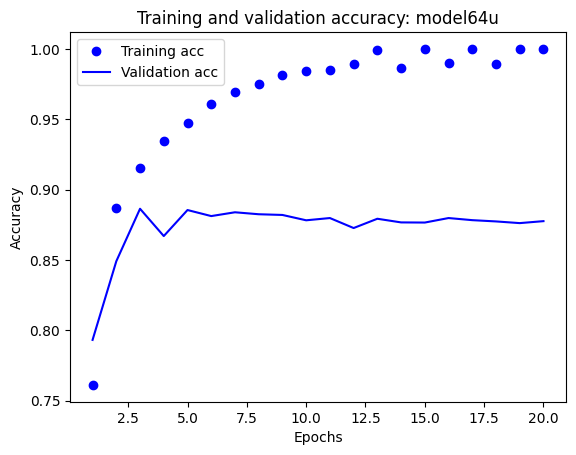

In [ ]:
plt.clf()
acc = history_dict64u["accuracy"]
val_acc = history_dict64u["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy: model64u")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

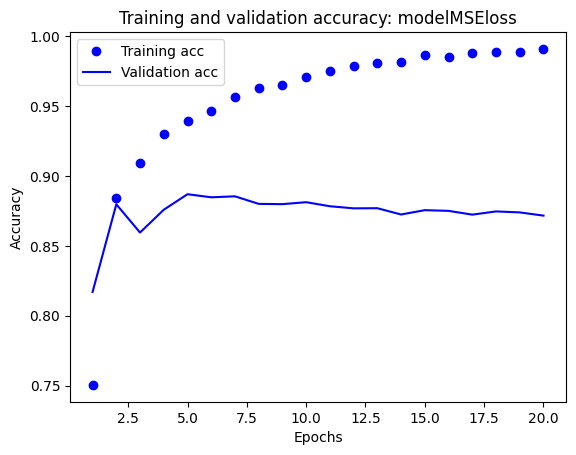

In [ ]:
plt.clf()
acc = history_dictMSEloss["accuracy"]
val_acc = history_dictMSEloss["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy: modelMSEloss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

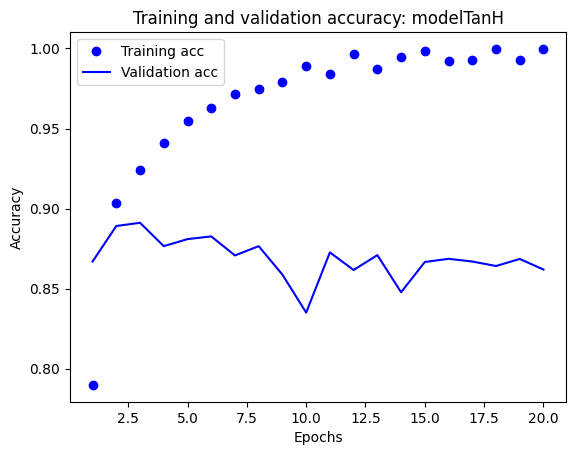

In [ ]:
plt.clf()
acc = history_dictTanH["accuracy"]
val_acc = history_dictTanH["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy: modelTanH")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 39ms/step - loss: 0.4528 - accuracy: 0.8096
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2657 - accuracy: 0.9050
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2086 - accuracy: 0.9245
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2885 - accuracy: 0.8854


In [ ]:
results

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

### Further experiments

### Wrapping up